In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import socket
import time
import StringIO

#this function is used to plot the result
def plotResult(result,imageFiles = 'images/'):
    """
    result: str, should looks like "original_image \t image1,image2,image3..."
    """
    result = result.strip()
    images = result.split(',')
    original_image = images[0]
    images = images[1:]
    plt.figure(figsize=(3.5,3.5))
    plt.title('original image')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plt.imread(imageFiles + original_image))
    #plot the search result
    if len(images)<=6:
        y = 3
        x = 2
    elif len(images)<=9:
        y = 3
        x = 3
    else:
        y = 3
        x = 3
        images = images[0:9]
    f,ax = plt.subplots(x,y)
    f.set_figheight(x*3)
    f.set_figwidth(y*3)
    for i in range(x):
        for j in range(y):
            if(y*i+j<len(images)):
                if images[y*i+j]!='':
                    im = plt.imread(imageFiles + images[y*i+j])
                    plt.axes(ax[i,j])
                    plt.xticks([])
                    plt.yticks([])
                    plt.imshow(im)
                else:
                    plt.axes(ax[i,j])
                    plt.xticks([])
                    plt.yticks([])                    
            else:
                    plt.axes(ax[i,j])
                    plt.xticks([])
                    plt.yticks([])
    plt.tight_layout(pad=2,w_pad=0.1,h_pad=0.1)
    plt.suptitle('Searching result',fontsize=14)
    plt.show()


#first receive data from 10000
def serverReceiver(host='localhost',port=10000):
    while True:
        try:
            serverSocket = socket.socket(socket.AF_INET,socket.SOCK_STREAM)
            serverSocket.bind((host,port))
            serverSocket.listen(1)
            try:
                while True:
                    connection,address = serverSocket.accept()
                    connection.settimeout(100000)
                    while True:
                        try:
                            result = connection.recv(1024)
                            if result!='':
                                #because java writeUTF will send the bytes in the first two charactor, ingore
                                result = StringIO.StringIO(result)
                                result.read(2)
                                result = result.read()
                                plotResult(result)
                            else:
                                print "accept none, break"
                                break
                            time.sleep(2)
                        except Exception as e:
                            print "excption 1:"+ str(e)
                            break
            except socket.timeout:
                print 'timeout'
            except socket.error,e:
                print e
                print "socket ends from other side"
                #right now, not handling errors
                pass
            except KeyboardInterrupt:
                print "catch keyinterp???"
            finally:
                print "finnally 1"
                connection.close()
                serverSocket.close()
                break  
        except KeyboardInterrupt:
            print "catch keyinterp???"
            serverSocket.close()
            break
        except Exception as e:
            print str(e)
        finally:
            print "finally 2"
            serverSocket.close()       
            break

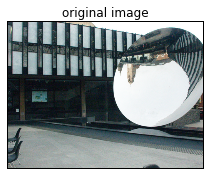

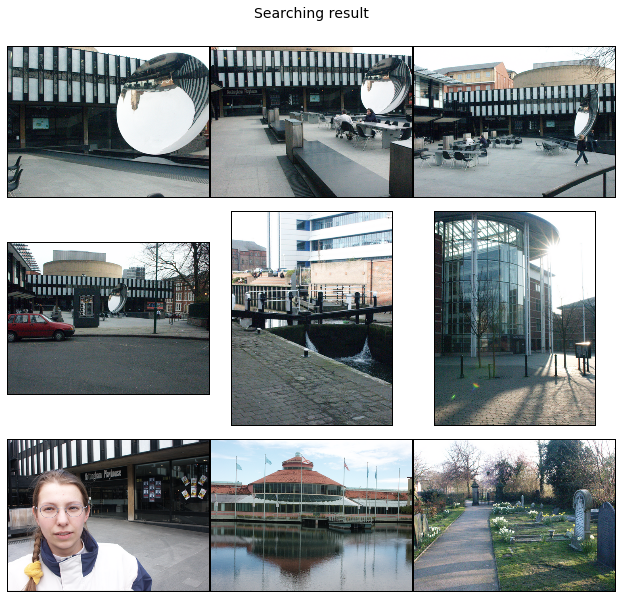

accept none, break


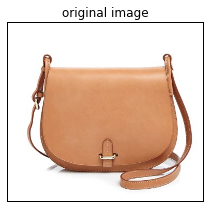

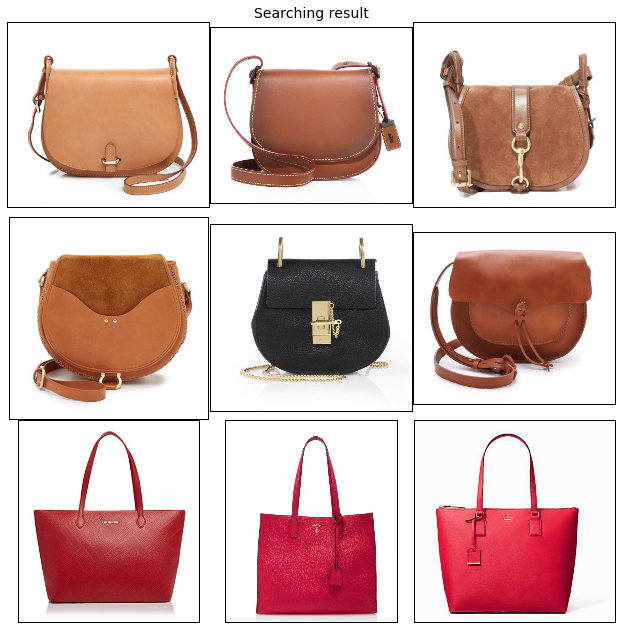

accept none, break
catch keyinterp???
finnally 1
finally 2


In [2]:
serverReceiver()

In [2]:
#these two lines are used to generate image path files used for hadoop
import shutil
import glob

In [4]:
path = '/Users/yh/Desktop/bigdata/project/'
glob.glob('images/*')
f = open('files.txt','w')
for name in glob.glob('images/*'):
    f.write(path + name + '\n')
f.close()

In [3]:
f = open('imagePath.txt')
f2 = open('imagesPath.txt','w')
line = f.readline()
while line:
    f2.write('file://'+line)
    line = f.readline()
f.close()
f2.close()